# Loading Data into a Dataframe and EDA

In [1]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('train_project3.csv')
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


In [3]:
df.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual

In [4]:
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [6]:
df.corr().abs()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
PID                0.255052
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Enclosed Porch     0.135656
Screen Porch       0.134581
Kitchen AbvGr      0.125444
Overall Cond       0.097019
MS SubClass        0.087335
Id                 0.051398
3Ssn Porch         0.048732
Bsmt Half Bath     0.045328
Low Qual Fin SF    0.041594
Mo Sold            0.032735
Pool Area          0

In [7]:
X = df[['Overall Qual','1st Flr SF', 'Total Bsmt SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces', 'Mas Vnr Area', 'BsmtFin SF 1', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF']].values
y = df['SalePrice'].values

In [8]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
Imputed = imp.transform(X)
imputed_df = pd.DataFrame(Imputed)
imputed_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,6.0,725.0,725.0,1479.0,2.0,475.0,1976.0,2005.0,2.0,1976.0,6.0,0.0,289.0,533.0,69.0552,44.0,0.0
1,7.0,913.0,913.0,2122.0,2.0,559.0,1996.0,1997.0,2.0,1997.0,8.0,1.0,132.0,637.0,43.0000,74.0,0.0
2,5.0,1057.0,1057.0,1057.0,1.0,246.0,1953.0,2007.0,1.0,1953.0,5.0,0.0,0.0,731.0,68.0000,52.0,0.0
3,5.0,744.0,384.0,1444.0,2.0,400.0,2006.0,2007.0,2.0,2007.0,7.0,0.0,0.0,0.0,73.0000,0.0,100.0
4,6.0,831.0,676.0,1445.0,2.0,484.0,1900.0,1993.0,2.0,1957.0,6.0,0.0,0.0,0.0,82.0000,59.0,0.0


In [9]:
df[['Overall Qual','1st Flr SF', 'Total Bsmt SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces', 'Mas Vnr Area', 'BsmtFin SF 1', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF']] = imputed_df.iloc[:, :]

In [10]:
X = df[['Overall Qual', '1st Flr SF', 'Total Bsmt SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces', 'Mas Vnr Area', 'BsmtFin SF 1', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF']].values
y = df['SalePrice'].values

In [11]:
df[['Overall Qual', '1st Flr SF', 'Total Bsmt SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces', 'Mas Vnr Area', 'BsmtFin SF 1', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF']].isnull().sum()

Overall Qual      0
1st Flr SF        0
Total Bsmt SF     0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
Year Built        0
Year Remod/Add    0
Full Bath         0
Garage Yr Blt     0
TotRms AbvGrd     0
Fireplaces        0
Mas Vnr Area      0
BsmtFin SF 1      0
Lot Frontage      0
Open Porch SF     0
Wood Deck SF      0
dtype: int64

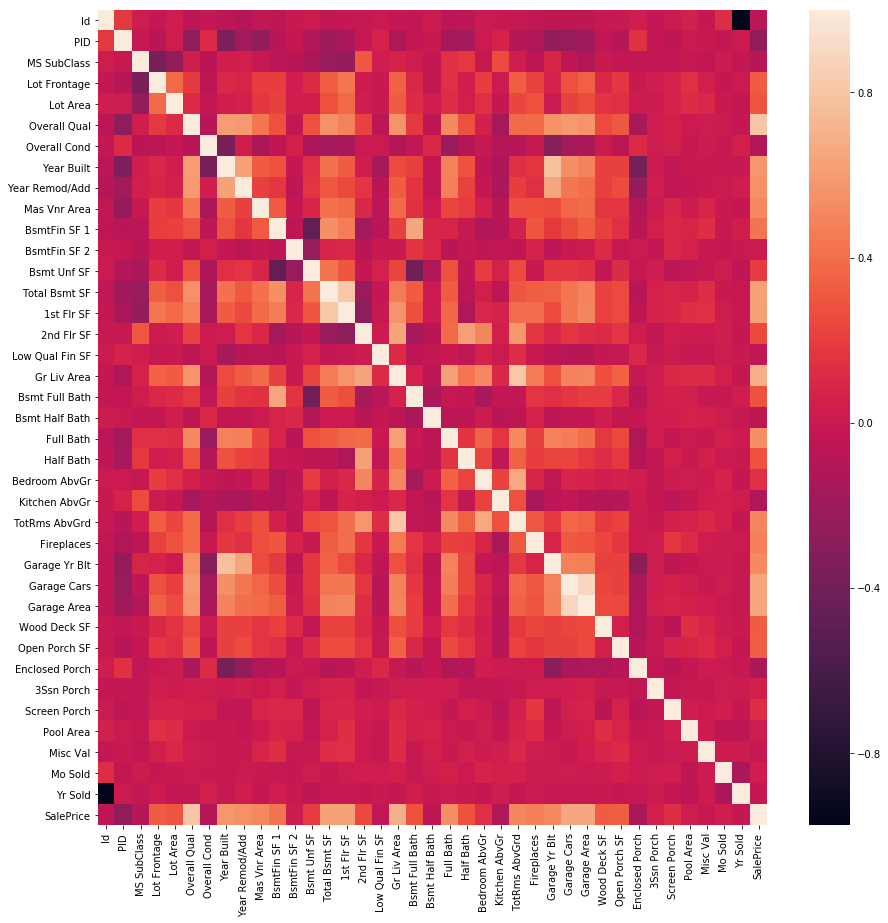

In [12]:
plt.figure(figsize= (15, 15))
sns.heatmap(df.corr())
# Target variables: Overall Qual, Total Bsmt SF, 1st Flr SF, GR Liv Area, Garage Cars, Garage Area

In [13]:
ss = StandardScaler()
ss.fit(X)
X_standard = ss.transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.20)

In [28]:
rfregr = RandomForestRegressor(warm_start=True)
rfregr_params = {'n_estimators': [50, 75, 100, 125],
                'criterion': ['mse', 'mae'],
                'max_features': ['auto', 'sqrt', 'log2', None],
                'max_depth': range(8, 11),}
rfregr_model = GridSearchCV(rfregr, rfregr_params, scoring='neg_mean_squared_error')
rfregr_model.fit(X_train, y_train)
print('best score', rfregr_model.best_score_)
print('best params', rfregr_model.best_params_)
print('test score', rfregr_model.score(X_test, y_test))

best score -732759575.299
best params {'criterion': 'mse', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 125}
test score -687579131.269


In [15]:
grdboost = GradientBoostingRegressor()
grdboost_params = {'n_estimators': [75, 100, 125, 150],
                   'max_depth': range(2, 5),
                  'max_features': ['auto', 'log2', None],
                  'min_samples_split': [2,3,4]}
grdboost_model = GridSearchCV(grdboost, grdboost_params, scoring='neg_mean_squared_error')
grdboost_model.fit(X_train, y_train)
print('best score', grdboost_model.best_score_)
print('best params', grdboost_model.best_params_)
print('test score', grdboost_model.score(X_test, y_test))

best score -710871209.207
best params {'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 125}
test score -591339422.722


In [16]:
best_grd = grdboost_model.best_estimator_
best_grd

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=3,
             min_weight_fraction_leaf=0.0, n_estimators=125,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [16]:
best_rfregr = rfregr_model.best_estimator_
best_rfregr

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=125, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
df2 = pd.read_csv('test_project3.csv')
df2.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [18]:
Xtest = df2[['Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces', 'Mas Vnr Area', 'BsmtFin SF 1', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF']].values

In [19]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df2[['Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces', 'Mas Vnr Area', 'BsmtFin SF 1', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF']].values)
Imputed_test = imp.transform(df2[['Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces', 'Mas Vnr Area', 'BsmtFin SF 1', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF']].values)
imputed_df2 = pd.DataFrame(Imputed_test)
imputed_df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,6.0,1020.0,908.0,1928.0,1.0,440.0,1910.0,1950.0,2.0,1910.0,9.0,0.0,0.0,0.0,69.000000,60.0,0.0
1,5.0,1967.0,1967.0,1967.0,2.0,580.0,1977.0,1977.0,2.0,1977.0,10.0,0.0,0.0,0.0,69.630042,0.0,170.0
2,7.0,654.0,664.0,1496.0,2.0,426.0,2006.0,2006.0,2.0,2006.0,7.0,1.0,0.0,554.0,58.000000,24.0,100.0
3,5.0,968.0,968.0,968.0,2.0,480.0,1923.0,2006.0,1.0,1935.0,5.0,0.0,0.0,0.0,60.000000,0.0,0.0
4,6.0,1394.0,1394.0,1394.0,2.0,514.0,1963.0,1963.0,1.0,1963.0,6.0,2.0,247.0,609.0,69.630042,76.0,0.0


In [20]:
df2[['Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces', 'Mas Vnr Area', 'BsmtFin SF 1', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF']] = imputed_df2.iloc[:, :]

In [21]:
Xtest = df2[['Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces', 'Mas Vnr Area', 'BsmtFin SF 1', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF']].values
Xtest

array([[    6.        ,  1020.        ,   908.        , ...,
           69.        ,    60.        ,     0.        ],
       [    5.        ,  1967.        ,  1967.        , ...,
           69.63004172,     0.        ,   170.        ],
       [    7.        ,   654.        ,   664.        , ...,
           58.        ,    24.        ,   100.        ],
       ..., 
       [    5.        ,   952.        ,  1211.        , ...,
           55.        ,    63.        ,     0.        ],
       [    4.        ,   864.        ,   864.        , ...,
           60.        ,     0.        ,     0.        ],
       [    5.        ,   923.        ,   925.        , ...,
           70.        ,     0.        ,    81.        ]])

In [22]:
df2[['Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces', 'Mas Vnr Area', 'BsmtFin SF 1', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF']].isnull().sum()

Overall Qual      0
Total Bsmt SF     0
1st Flr SF        0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
Year Built        0
Year Remod/Add    0
Full Bath         0
Garage Yr Blt     0
TotRms AbvGrd     0
Fireplaces        0
Mas Vnr Area      0
BsmtFin SF 1      0
Lot Frontage      0
Open Porch SF     0
Wood Deck SF      0
dtype: int64

In [23]:
ss = StandardScaler()
X_test_standard = ss.fit_transform(Xtest)

In [24]:
rfregr_id = df2[['Id']]
rfregr_id.shape

(879, 1)

In [25]:
rfregr_predictions = pd.DataFrame(best_grd.predict(X_test_standard), columns = ['SalePrice'])
rfregr_predictions.shape

(879, 1)

In [36]:
id_test = np.array(df2['Id'])

In [50]:
df2_predictions = pd.DataFrame(predictions, id_test)
df2_predictions.shape

(879, 1)

In [34]:
df2_predictions.columns = ['SalePrice']
df2_predictions.index.name = 'Id'
df2_predictions

,SalePrice
Id,
2658,164629.510856
2718,222376.411929
2414,132367.359570
1989,170985.818424
625,144647.959053
333,220552.343971
1327,146702.541433
858,138445.186545
95,121407.993056


In [36]:
df2_predictions.to_csv('Regression_Predictions_5.csv')

In [26]:
rfregr_submission = pd.concat([rfregr_id, rfregr_predictions], axis=1)
rfregr_submission.shape

(879, 2)

In [27]:
rfregr_submission.to_csv('GradientBoosting_Predictions11.csv', index=False)